# Qantitative Analyst Case Study
## Validus

#### Task
Consider a multiperiod binomial asset model for an FX spot rate S with N periods. Under this particular model, we have the following assumptions:

· the initial price of the asset is 𝑆0=1.28065;

· under the risk-neutral measure, the asset price at period j is 𝑆𝑗=(1+𝑣)𝑆𝑗−1 with probability ½, and 𝑆𝑗=(1−𝑣)𝑆𝑗−1 with probability ½, with 0<𝑣<1; and

· domestic and foreign interest rates associated with borrowing/lending a currency for a single time period is 0.

The initial price of the asset is 1.28065

Assumptions

Under the risk neutral meausre, the asseet price at period j is S_j = (1+v) * S_(j-1) and S_j =(1-v) * S_(j-1), each with 0.5 probability. 

Under these asssumption, there is at period j an up and down scenarios which can be denoted as:
u = (1+v)
d = (1-v)
each with 0.5 probability. 

S_j = (S_(j-1) * (u * 0.5)) + (S_(j-1) * (d * 0.5))

# import libraries

In [561]:
%run Functions.ipynb
import pandas as pd
import numpy as np
from scipy.stats import norm
from datetime import date
from numpy_financial import irr


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 42)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 42)

Defines values

In [519]:
# input
N = 10
v = 0.05
S0 = 1.28065
K = S0

In [520]:
u = (1+v)
d = (1-v)
p = 0.5

In [521]:
V = put_option(S0 = S0, 
               v = v, 
               K = K, 
               N = N, 
               p = p)
print(f'The value of the put option is', V)

The value of the put option is 0.36522993140918225


In [522]:
# Calibrate v to match the given option price
v = calibrate_v(K = K, V = V, N = 10, S0 = S0)

In [523]:
maxS = max_s(v = v, N = 1000)

In [524]:
# Calculate the asset prices 
S = [S0 * u ** j * d ** (N - j) for j in range(N + 1)]
# Calculate the option value 
option_payoff = [max(K - S[j], 0) for j in range(N + 1)] 

4. Using the GBPUSD FX spot rate paths, derived from the above binomial model for 𝑁=10 (Δτ=0.5 years),𝑣=0.05, convert the GBP cashflows (provided in the cashflow data spreadsheet) into fund currency (USD) and calculate the IRR (internal rate of return) for each of the paths. Plot the distribution of the IRR values.

In [525]:
# load excel sheet with cash flow information
file_name =  'Quantitative_Analyst_Case_Study_2024_Cashflow_Model.xlsx'
df = pd.read_excel(file_name)
df


,Time,Fund,Cashflow Type,Cashflow Amount (in Local Asset Currecny),Local Asset Currency,Fund Currency,Base Case IRR
0,2024-03-31,Validus V,Equity,-100000000,GBP,USD,0.149925
1,2025-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
2,2026-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
3,2027-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
4,2028-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN
5,2029-03-31,Validus V,Proceeds,115000000,GBP,USD,NaN


In [526]:
# Function to simulate GBPUSD FX spot rate paths
def simulate_fx_spot_rate_paths(N, v, delta_tau, num_paths):
    u = 1 + v
    d = 1 - v
    
    # Initialize array to store simulated FX spot rate paths
    fx_spot_rate_paths = np.zeros((num_paths, N+1))
    
    # Simulate FX spot rate paths
    for i in range(num_paths):
        fx_spot_rate = 1.28065  # Initial GBPUSD FX spot rate
        for j in range(N+1):
            fx_spot_rate_paths[i][j] = fx_spot_rate
            fx_spot_rate *= np.random.choice([u, d], p=[0.5, 0.5])
    
    return fx_spot_rate_paths


In [527]:
# Given parameters
N = 10  # Number of periods
v = 0.05  # Price movement factor
delta_tau = 0.5  # Time interval in years
num_paths = 6  # Number of simulated paths

# Simulate FX spot rate paths
fx_spot_rate_paths = simulate_fx_spot_rate_paths(N, v, delta_tau, num_paths)

In [528]:
results = [df['Base Case IRR'][0]]
df['time'] = df.index


In [529]:
for i in df.index:
    df1 = pd.DataFrame({'path': fx_spot_rate_paths[i],
                        "time": np.arange(0, 5.5, 0.5)})
    
    inner_join_df = pd.merge(df, df1, on='time', how='inner')
    cashflow = inner_join_df['Cashflow Amount (in Local Asset Currecny)']/inner_join_df['path']

    irr_value = irr(cashflow)
    results.append(irr_value)

/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/2406110382.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join_df = pd.merge(df, df1, on='time', how='inner')
/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/2406110382.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join_df = pd.merge(df, df1, on='time', how='inner')
/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/2406110382.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join_df = pd.merge(df, df1, on='time', how='inner')
/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/2406110382.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  inner_join

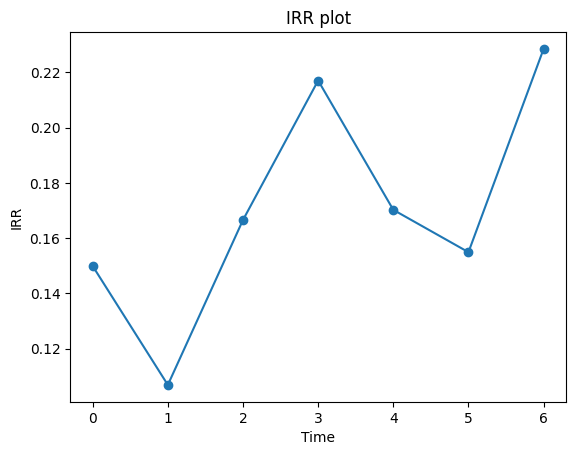

In [530]:
# Plot the values
plt.plot(results, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('IRR')
plt.title('IRR plot')

# Show the plot
plt.show()


Assume we would like to buy a GBPUSD European put option to hedge our FX exposure. If the USD and GBP interest rates are 0% throughout the time horizon of the fund, calculate the option’s fair market value (premium) at trade date (t = 0). See the option details below:

· Trade date: 31/03/2024

· Expiry Date: 31/03/2029

· Notional Amount: 100,000,000 GBP

· Strike 𝐾=𝑆0=1.28065


In [531]:
notional = 100000000
premium = 1/V * notional
print(f'The value of the option in GDP is', round(premium, 2)) 

The value of the option in GDP is 273800122.61


6. Calculate the IRR of the hedged portfolio, including the option premium payment you calculated in (5) and the option payoff. Plot the distribution of the hedged portfolio IRR values.

In [533]:
temp = pd.DataFrame({'FX': S, "time": np.arange(0, 5.5, 0.5), "option_payoff" :option_payoff})
df1 = pd.merge(df, temp, on='time', how='inner') # Since cash flows are given yearly, delta t is 0.5, the correct FX and option values should match the cash flow dates
df1['cashflow(USD)'] = df1['Cashflow Amount (in Local Asset Currecny)']/df1['FX'] # calculate to GBP
df1

/var/folders/gc/3nx2jxd91p9crs2vh_4k6ldw0000gn/T/ipykernel_34656/1816275699.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df1 = pd.merge(df, temp, on='time', how='inner') # Since cash flows are given yearly, delta t is 0.5, the correct FX and option values should match the cash flow dates


,Time,Fund,Cashflow Type,Cashflow Amount (in Local Asset Currecny),Local Asset Currency,Fund Currency,Base Case IRR,time,FX,option_payoff,cashflow(USD)
0,2024-03-31,Validus V,Equity,-100000000,GBP,USD,0.149925,0,0.766772,0.513878,-1.304168e+08
1,2025-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN,1,0.936694,0.343956,1.601376e+07
2,2026-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN,2,1.144272,0.136378,1.310877e+07
3,2027-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN,3,1.397850,0.000000,1.073076e+07
4,2028-03-31,Validus V,Proceeds,15000000,GBP,USD,NaN,4,1.707623,0.000000,8.784139e+06
5,2029-03-31,Validus V,Proceeds,115000000,GBP,USD,NaN,5,2.086044,0.000000,5.512827e+07


In [559]:
option_payoff_values = df1['option_payoff'] * df1['cashflow(USD)']

In [560]:
option_payoff_values

0   -6.701826e+07
1    5.508024e+06
2    1.787748e+06
3    0.000000e+00
4    0.000000e+00
5    0.000000e+00
dtype: float64

In [554]:
hedged_portfolio_cashflows = [-premium * option_payoff for option_payoff in option_payoff_values]

In [555]:
print("Hedged portfolio cash flows:", hedged_portfolio_cashflows)


Hedged portfolio cash flows: [140699733.11925852, 94175102.89236262, 37340305.30216565, 0.0, 0.0, 0.0]


In [556]:
irr(hedged_portfolio_cashflows)

nan

In [486]:

# Plot the distribution of IRR values
plt.hist(irr_values, bins=30, color='blue', edgecolor='black')
plt.xlabel('IRR')
plt.ylabel('Frequency')
plt.title('Distribution of Hedged Portfolio IRR Values')
plt.grid(True)
plt.show()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan